# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | saint-paul
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | emerald
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | lebedyan'
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | port-aux-fran

Processing Record 41 of Set 4 | sooke
Processing Record 42 of Set 4 | sao tome
Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | chesma
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | baskale
Processing Record 48 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 49 of Set 4 | kenora
Processing Record 0 of Set 5 | kitami
Processing Record 1 of Set 5 | mashava
Processing Record 2 of Set 5 | bikenibeu village
Processing Record 3 of Set 5 | aswan
Processing Record 4 of Set 5 | llorente
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | hermanus
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | kula
Processing Record 10 of Set 5 | taunggyi
Processing Record 11 of Set 5 | merizo village
Processing Record 12 of Set 5 | broken hill
Processing Record 13 of Set 5 | pyhaselka
Processing 

Processing Record 32 of Set 8 | nsanje
Processing Record 33 of Set 8 | ashland
Processing Record 34 of Set 8 | aberdeen
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | slyudyanka
Processing Record 37 of Set 8 | chiili
City not found. Skipping...
Processing Record 38 of Set 8 | axim
Processing Record 39 of Set 8 | zheleznodorozhnyy
Processing Record 40 of Set 8 | yakeshi
Processing Record 41 of Set 8 | rongelap
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | gadzhiyevo
Processing Record 44 of Set 8 | sao vicente
Processing Record 45 of Set 8 | barcelona
Processing Record 46 of Set 8 | marsh harbour
Processing Record 47 of Set 8 | sabha
Processing Record 48 of Set 8 | vieste
Processing Record 49 of Set 8 | ampasimanolotra
City not found. Skipping...
Processing Record 0 of Set 9 | tefe
Processing Record 1 of Set 9 | la gi
Processing Record 2 of Set 9 | ngaoundere
Processing Record 3 of Set 9 | sidi khaled
Processing Record 4 of Set 9 | ri

Processing Record 20 of Set 12 | olinda
Processing Record 21 of Set 12 | bogotol
Processing Record 22 of Set 12 | phalaborwa
Processing Record 23 of Set 12 | tateyama
Processing Record 24 of Set 12 | selty
Processing Record 25 of Set 12 | manali
Processing Record 26 of Set 12 | lengshuijiang
Processing Record 27 of Set 12 | shelkovskaya
Processing Record 28 of Set 12 | karamay
Processing Record 29 of Set 12 | qionghai
Processing Record 30 of Set 12 | saint peter
Processing Record 31 of Set 12 | ba
City not found. Skipping...
Processing Record 32 of Set 12 | puerto san jose
Processing Record 33 of Set 12 | mokhsogollokh
Processing Record 34 of Set 12 | cole harbour
Processing Record 35 of Set 12 | bovril
Processing Record 36 of Set 12 | shafter
Processing Record 37 of Set 12 | landen
Processing Record 38 of Set 12 | oualidia
City not found. Skipping...
Processing Record 39 of Set 12 | asaita
Processing Record 40 of Set 12 | san carlos
Processing Record 41 of Set 12 | ak'ordat
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,8.34,72,82,4.02,NZ,1726440073
1,kodiak,57.7900,-152.4072,15.73,41,20,6.69,US,1726440178
2,vilyuchinsk,52.9306,158.4028,9.15,56,74,7.84,RU,1726440179
3,keflavik,64.0049,-22.5624,5.24,60,0,4.12,IS,1726440180
4,adamstown,-25.0660,-130.1015,20.27,81,100,6.85,PN,1726440181


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,8.34,72,82,4.02,NZ,1726440073
1,kodiak,57.7900,-152.4072,15.73,41,20,6.69,US,1726440178
2,vilyuchinsk,52.9306,158.4028,9.15,56,74,7.84,RU,1726440179
3,keflavik,64.0049,-22.5624,5.24,60,0,4.12,IS,1726440180
4,adamstown,-25.0660,-130.1015,20.27,81,100,6.85,PN,1726440181


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

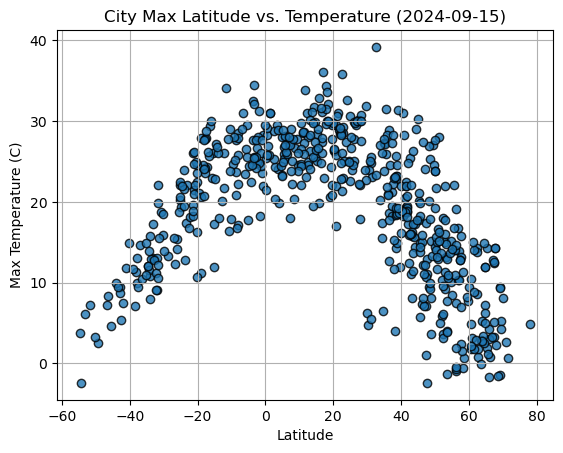

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

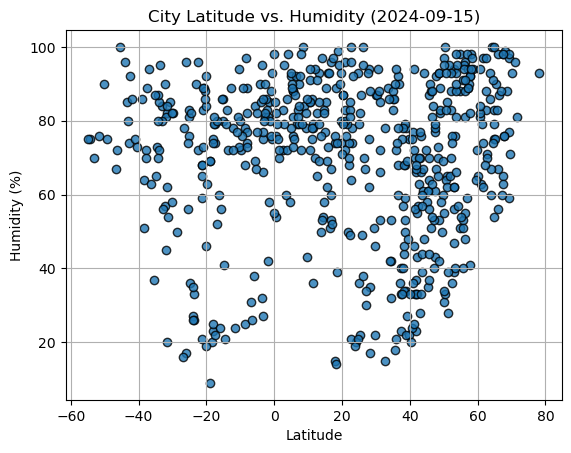

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

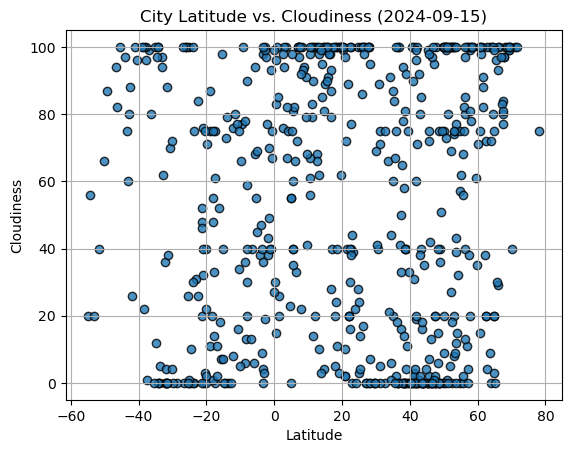

In [10]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")
# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

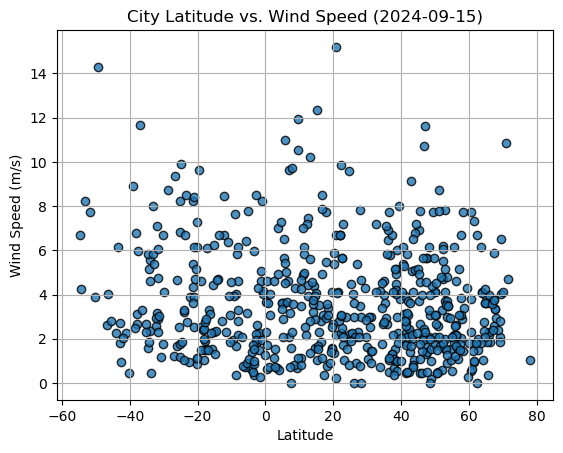

In [11]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def LinearRegression(x_values, y_values,y_label,x_coord,y_coord):
    slope = linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Plot values
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "-r")
    plt.annotate(line_eq,(x_coord,y_coord),fontsize=15,color="red")
    plt.title(f'Latitude vs {y_label}')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f'The r^2-value is: {rvalue**2}')
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,15.73,41,20,6.69,US,1726440178
2,vilyuchinsk,52.9306,158.4028,9.15,56,74,7.84,RU,1726440179
3,keflavik,64.0049,-22.5624,5.24,60,0,4.12,IS,1726440180
7,bethel,41.3712,-73.4140,21.99,72,3,0.45,US,1726440184
10,vorgashor,67.5833,63.9500,12.43,98,80,3.78,RU,1726440188


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,8.34,72,82,4.02,NZ,1726440073
4,adamstown,-25.0660,-130.1015,20.27,81,100,6.85,PN,1726440181
5,grytviken,-54.2811,-36.5092,-2.42,75,56,4.25,GS,1726440182
6,puerto natales,-51.7236,-72.4875,7.25,76,40,7.72,CL,1726440183
8,saint-paul,-21.0096,55.2707,21.41,83,76,2.52,RE,1726440185


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5924964247848196


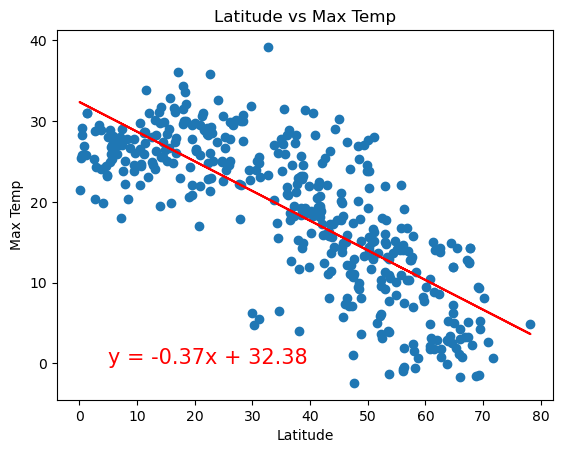

In [15]:
# Linear regression on Northern Hemisphere
LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",5,0)



The r^2-value is: 0.7048429229560504


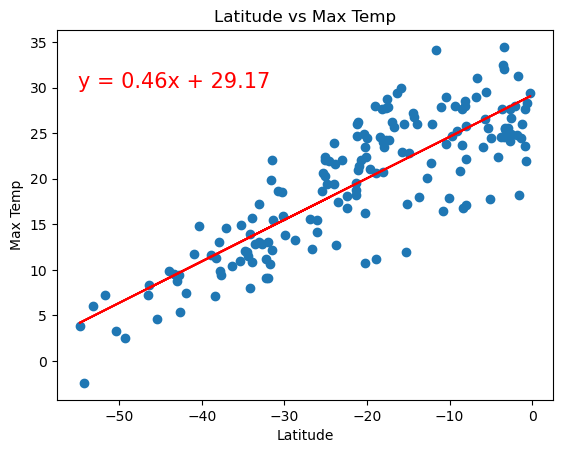

In [16]:
# Linear regression on Southern Hemisphere

LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",-55,30)

**Discussion about the linear relationship:** Latitude and maximum temperature are closely related. In the Northern Hemisphere, higher latitudes tend to have lower maximum temperatures, whereas in the Southern Hemisphere, higher latitudes correspond to higher temperatures. Maximum temperatures increase as we get nearer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0003631624127025133


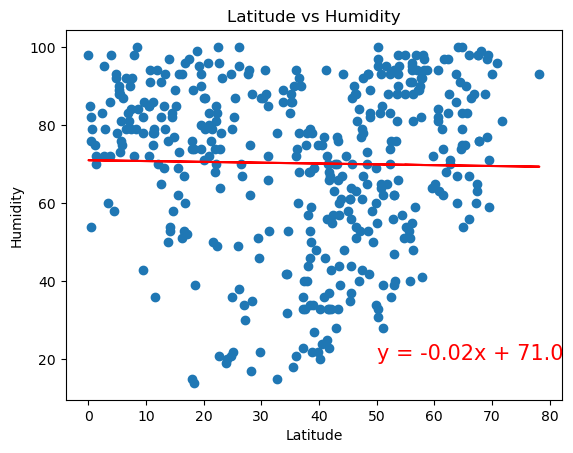

In [17]:
# Northern Hemisphere
LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity",50,20)


The r^2-value is: 0.0033788578795402317


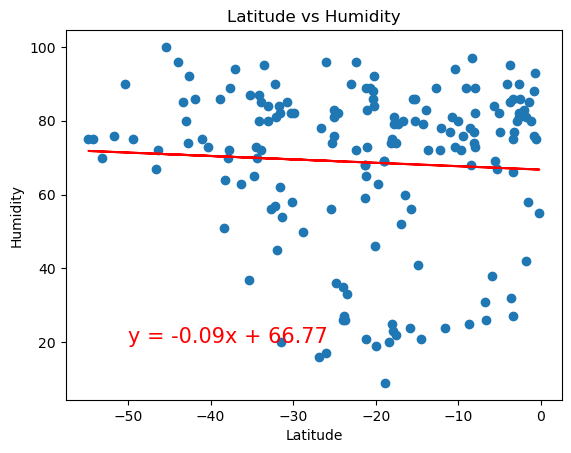

In [18]:
# Southern Hemisphere
LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity",-50,20)

**Discussion about the linear relationship:** The linear equations for both hemispheres reveal a very slight positive correlation, suggesting that being closer to the equator has little impact on humidity. The scatter plot shows that the data points are widely dispersed, making it difficult to establish any meaningful correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0066455046937833806


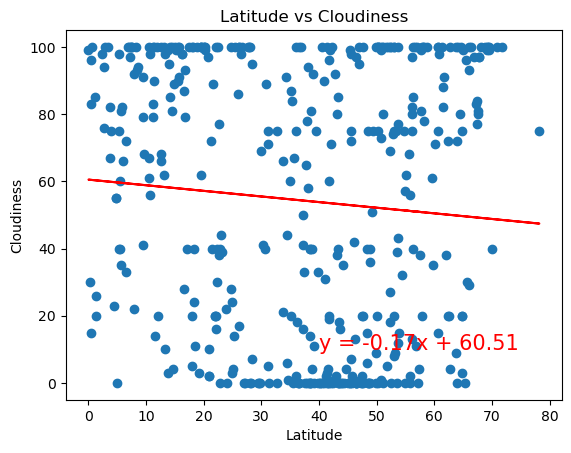

In [19]:
# Northern Hemisphere
LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",40,10)

The r^2-value is: 0.008447957797051616


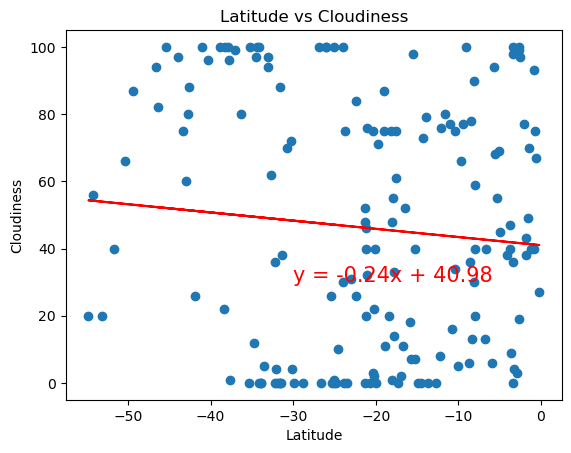

In [20]:
# Southern Hemisphere
LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",-30,30)

**Discussion about the linear relationship:** The linear equations for both hemispheres display a slight positive correlation, indicating that proximity to the equator has little effect on cloudiness. Additionally, the scatter plot reveals that the data points are too dispersed to establish a reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.013116216084638255


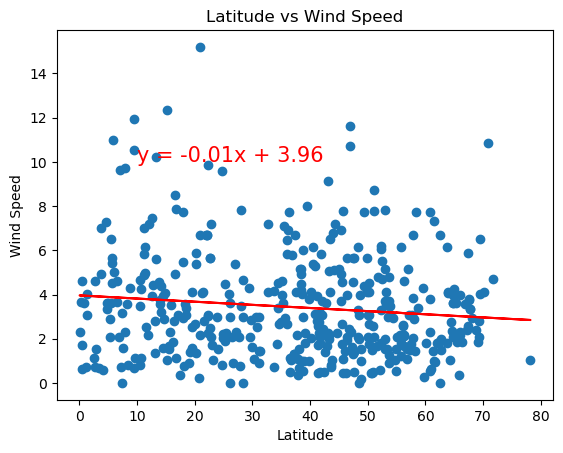

In [21]:
# Northern Hemisphere
LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed",10,10)

The r^2-value is: 0.048035981485329504


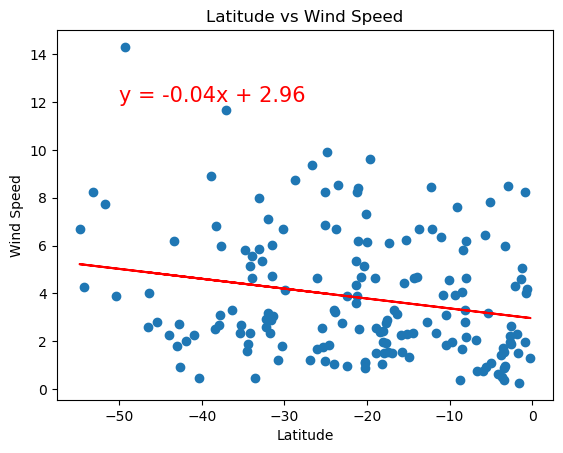

In [22]:
# Southern Hemisphere
LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed",-50,12)

**Discussion about the linear relationship:** The low r²-value for both hemispheres suggests a weak correlation, and the scatter plot reveals that the data points are too widely distributed to establish any meaningful connection between latitude and wind speed.